# CSCI-UA 0473 - Introduction to Machine Learning
## Thursday, January 25, 2018

SURVEY:
1) Python
2) Numpy/sklearn
3) IPython Notebooks

## Perceptron
### Key Points
SETUP: We have a set of data points $\{(x_{1}, y_{1}), (x_{2}, y_{2}), ... , (x_{n}, y_{n})\}$, where $x_{i} \in R^{d}$ are the feature vectors and $y_{i} \in \{0, 1\}$ are the class labels.

MODEL: $\hat{y} = sign(w.x + b)$, where $w, b \in R^{d}$

DISTANCE FUNCTION: -$(y - \hat{y}) * (w.x + b)$

LEARNING RULE: $w \leftarrow w + \eta * (y - \hat{y}) * x$

In [22]:
# Loading the required libraries

%matplotlib notebook 
%matplotlib inline

import numpy
import matplotlib.pyplot as plot

import matplotlib
matplotlib.rc('text', usetex=True)

In [23]:
# Setting a random seed
numpy.random.seed(1234)

## 1. Data Preparation

In [24]:
# Sample dataset preparation

from sklearn.datasets import make_blobs
n_dim = 2
x_train, y_train = make_blobs(n_samples=100, n_features=n_dim, centers=[[1,1],[-1,-1]], shuffle=True)
x_test, y_test = make_blobs(n_samples=100, n_features=n_dim, centers=[[1,1],[-1,-1]], shuffle=True)


In [25]:
# Visualize data 
def vis_data(x, y, c='r', open_figure=False):
    if open_figure:
        plot.figure()
    for x_, y_ in zip(x, y):
        plot.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')
    plot.grid('on')
    plot.title('giwengieb')
    plot.show()

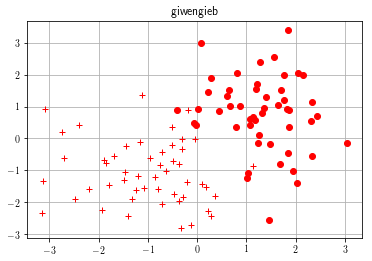

In [26]:
# Visualize TRAINING data
vis_data(x_train, y_train, open_figure=True)

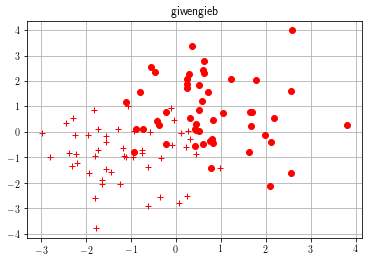

In [27]:
# Visualize TEST data
vis_data(x_test, y_test, open_figure=True)

## 2. Model Definition

In [28]:
'''
Basic functionality of the perceptron model.

INPUT: Feature vector (x) and a weight vector (w)
OUTPUT: Returns the sign of w.x or the value of w.x
'''

def perceptron(x, w, pre=False):
    def sign(y):
        return numpy.maximum(0., numpy.sign(y))
    
    x = x.reshape([1, -1]) if len(x.shape) < 2 else x
    
    y = numpy.sum(x * w[None,:-1], axis=1) + w[-1]
    if pre:
        return y    
    return sign(y)

In [29]:
'''
Distance function for the perceptron model.

INPUT: True labels of data points, feature vectors of data points and a weight vector
OUTPUT: Value of the distance for each data point or the average distance
'''

def perceptron_dist(y, x, w, avg=False):
    y_ = perceptron(x, w)
    d = -(y - y_) * perceptron(x, w, pre=True)
    if not avg:
        return d
    return numpy.mean(d)

In [30]:
'''
Learning rule for the perceptron model.

INPUT: True labels of data points, feature vectors of data points and a weight vector
OUTPUT: Update direction for the weight vector
'''

def perceptron_rule(y, x, w):
    y_ = perceptron(x, w)
    dw = numpy.zeros(w.shape)
    dw[:-1] = numpy.mean((y - y_)[:, None] * x, axis=0)
    dw[-1] = numpy.mean(y - y_)
    return dw

## 3. Learning Process

In [31]:
# Random initial weight vector
w0 = numpy.random.randn(n_dim+1); w0[-1] = 0.
w = numpy.copy(w0)

# Training Parameters
n_iter = 1000
eta = .1     # Learning rate
old_cost = numpy.Inf

# Training
for ni in range(n_iter):
    pred_y = perceptron(x_train, w)    # Dimension of 'pred_y'?
    
    w += eta * perceptron_rule(y_train, x_train, w)  # Updating the weight vector 
    
    cost = perceptron_dist(y_train, x_train, w, avg=True)
    
    print('Perceptron cost {:.4f} after iteration {}'.format(cost, ni))
    
    if cost < 1e-16 or cost / old_cost >= 1.:
        print('Converged')
        break
    old_cost = cost

Perceptron cost 1.5330 after iteration 0
Perceptron cost 1.3090 after iteration 1
Perceptron cost 1.0851 after iteration 2
Perceptron cost 0.8612 after iteration 3
Perceptron cost 0.6373 after iteration 4
Perceptron cost 0.4134 after iteration 5
Perceptron cost 0.1896 after iteration 6
Perceptron cost 0.0007 after iteration 7
Perceptron cost 0.0002 after iteration 8
Perceptron cost 0.0002 after iteration 9
Perceptron cost 0.0001 after iteration 10
Perceptron cost 0.0002 after iteration 11
Converged


In [32]:
print('Initial: {:.3f} x_1 + {:.3f} x_2 + {:.3f} = 0'.format(*list(w0)))
print('Final: {:.3f} x_1 + {:.3f} x_2 + {:.3f} = 0'.format(*list(w)))

Initial: 0.901 x_1 + 0.753 x_2 + 0.000 = 0
Final: -0.017 x_1 + -0.010 x_2 + 0.003 = 0


## 4. Visualize Final Model

In [33]:
def vis_hyperplane(w, typ='k--'):

    lim0 = plot.gca().get_xlim()
    lim1 = plot.gca().get_ylim()
    m0, m1 = lim0[0], lim0[1]

    intercept0 = -(w[0] * m0 + w[-1])/w[1]
    intercept1 = -(w[0] * m1 + w[-1])/w[1]
    
    plt1, = plot.plot([m0, m1], [intercept0, intercept1], typ)

    plot.gca().set_xlim(lim0)
    plot.gca().set_ylim(lim1)
    
    
    return plt1

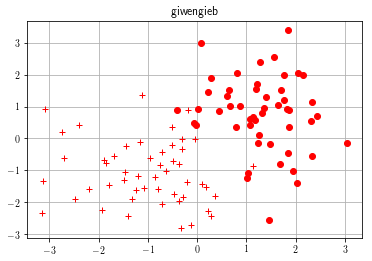

C:\IntelPython3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


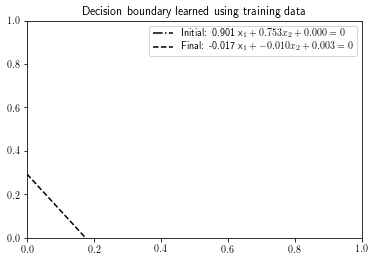

In [34]:
# Decision boundary learned using training data

plot.figure()

vis_data(x_train, y_train)

plt0 = vis_hyperplane(w0, 'k-.')
plt1 = vis_hyperplane(w, 'k--')


plot.legend([plt0, plt1], [
        'Initial: {:.3f} x_1 + {:.3f} x_2 + {:.3f} = 0'.format(*list(w0)),
        'Final: {:.3f} x_1 + {:.3f} x_2 + {:.3f} = 0'.format(*list(w))],
           loc='upper right')

plot.legend(fontsize = 20, loc = 'best')
plot.title('Decision boundary learned using training data')
#plot.show()

## 5. Testing

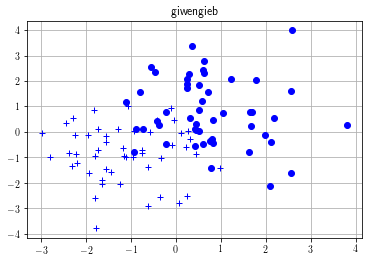

C:\IntelPython3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


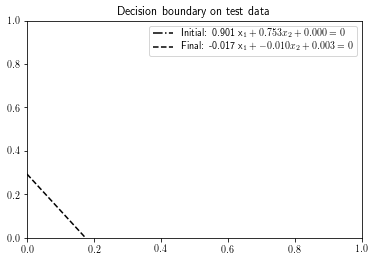

In [35]:
# Decision boundary on test data

plot.figure()

vis_data(x_test, y_test, 'b')

plt1 = vis_hyperplane(w, 'k--')


plot.legend([plt0, plt1], [
        'Initial: {:.3f} x_1 + {:.3f} x_2 + {:.3f} = 0'.format(*list(w0)),
        'Final: {:.3f} x_1 + {:.3f} x_2 + {:.3f} = 0'.format(*list(w))],
           loc='upper right')

plot.legend(fontsize = 20, loc = 'best')
plot.title('Decision boundary on test data')
#plot.show()

In [36]:
train_error = numpy.sum(numpy.abs(perceptron(x_train, w) - y_train)) / numpy.float(len(y_train))
test_error = numpy.sum(numpy.abs(perceptron(x_test, w) - y_test)) / numpy.float(len(y_test))

print('Training error rate {}, Test error rate {}'.format(train_error, test_error))

Training error rate 0.04, Test error rate 0.13


## 6. HOMEWORK - Use scikit-learn to replicate the above operations

In [37]:
# Use this cell to import required packages of sklearn

from sklearn.linear_model import Perceptron
#from sklearn.linear_model import linear_regression

In [89]:
# STEP 1: Create a Perceptron class instance

perceptron_instance = Perceptron(fit_intercept=True, random_state=1234, max_iter=1000, eta0 = 0.0045)

In [90]:
# STEP 2: Fit the perceptron model to the training data

our_w = numpy.copy(w0)
perceptron_instance.fit(X=x_train, y=y_train)#, coef_init=our_w)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.0045, fit_intercept=True,
      max_iter=1000, n_iter=None, n_jobs=1, penalty=None,
      random_state=1234, shuffle=True, tol=None, verbose=0,
      warm_start=False)

In [91]:
# STEP 3: Obtain the coefficients of the learned model (read the documentation to find out how)
# Uncomment and complete the following

sk_w = numpy.append(perceptron_instance.coef_[0], perceptron_instance.intercept_)

In [92]:
# STEP 4: Compare the feature coefficients obtained by sklearn and the custom module we have

# Note: Print the equations of the model learned by both implementations and comment about what you observe.
# Uncomment and complete the following

print('Custom : {:.3f} x_1 + {:.3f} x_2 + {:.3f} = 0'.format(*list(w)))
print('Sklearn: {:.3f} x_1 + {:.3f} x_2 + {:.3f} = 0'.format(*sk_w))

print('{:.3f}'.format(w[0]/w[1]))
print('{:.3f}'.format(sk_w[0]/sk_w[1]))

# From playing arround with the values it seems that the parameters that most effect what plane we're getting
# are whether or not we assume that the intercept should be learned or the data is already centered and what
# our tolerance is for stopping learning. When changing the eta from 0.1 to 0.01 the empirical values of x_1
# and x_2 get 10x smaller, but the angle of the learned decision boundary is the same.

Custom : -0.017 x_1 + -0.010 x_2 + 0.003 = 0
Sklearn: -0.018 x_1 + -0.010 x_2 + -0.000 = 0
1.677
1.877


In [93]:
# STEP 5: Predict the class of test data points. Print the TRAINING and TEST accuracy.
# Uncomment and complete the following

print('Training error rate {}, Test error rate {}'.format(train_error, test_error))

Training error rate 0.04, Test error rate 0.13
